### Assignment 7 - Dataset 1

•	Find two datasets each of which has two variables which we’ll call x and y, but they can have any names.

You should have a suspicion or intuition that in each dataset, variable y is linearly dependent on variable x.


•	For each dataset:

o	Create a scatter plot of the data.

o	Draw the least-squares regression line through the scatter plot.

o	Calculate and print the coefficient of determination and the correlation coefficient.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

###### Sleep_score data from Kaggle is chosen as the first dataset

The intuition is that during sleep, the heart rate below resting is high

You can find scientific proof here:
https://my.clevelandclinic.org/health/diseases/17841-bradycardia

In [2]:
sleep=pd.read_excel('Sleep.xlsx')

In [3]:
#Viewing the data
sleep.head()

,Day,DATE,SLEEP_SCORE,HOURS_OF_SLEEP,min,Minutes_of_sleep,REM_SLEEP,DEEP_SLEEP,HEART_RATE_BELOW_RESTING,SLEEP_TIME
0,Wednesday,2021-12-01,91,7,33,453,0.23,0.19,0.98,10:56pm - 7:20am
1,Thursday,2021-12-02,81,7,17,437,0.16,0.13,0.94,10:45pm - 6:58am
2,Friday,2021-12-03,80,7,17,437,0.15,0.17,0.78,10:51pm - 7:02am
3,Saturday,2021-12-04,85,8,23,503,0.20,0.15,0.58,9:53pm - 7:17am
4,Sunday,2021-12-05,82,7,19,439,0.20,0.12,0.79,11:54pm - 8:16am


###### Create a scatter plot of the data.

Text(0, 0.5, 'Sleep Score')

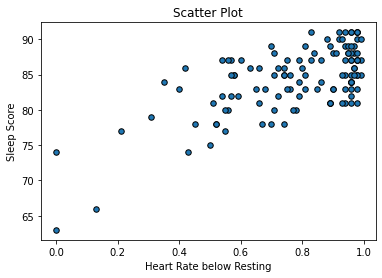

In [4]:
plt.scatter(sleep.HEART_RATE_BELOW_RESTING,sleep.SLEEP_SCORE,edgecolor ="black",s = 30,linewidths = 1)
plt.title('Scatter Plot')
plt.xlabel('Heart Rate below Resting')
plt.ylabel('Sleep Score')

##### Calculate and print the coefficient of determination and the correlation coefficient.

In [5]:
X = sleep['HEART_RATE_BELOW_RESTING'].values
Y = sleep['SLEEP_SCORE'].values

In [6]:
# Method 1: Calculating correlation coefficient using formula for it
X_mu=sum(X)/len(X)
Y_mu=sum(Y)/len(Y)
X_diff=0
Y_diff=0
X_Y_diff=0

for i in range(0,sleep.shape[0]):
    X_diff+=(X[i]-X_mu)**2
    Y_diff+=(Y[i]-Y_mu)**2
    X_Y_diff+=(X[i]-X_mu)*(Y[i]-Y_mu)
r=X_Y_diff/(((X_diff)**(1/2))*((Y_diff)**(1/2)))
print(f'Correlation: {round(r,2)}')

Correlation: 0.67


In [7]:
# Method 1: Calculating correlation coefficient using python function
correlation_matrix=np.corrcoef(sleep.SLEEP_SCORE,sleep.HEART_RATE_BELOW_RESTING)
# correlation_matrix

correlation=correlation_matrix[0,1]
print(f'Correlation: {round(correlation,2)}')

Correlation: 0.67


In [8]:
#Coefficient of determination
r_square=correlation**2
print(f'Co-efficient of Determination: {round(r_square,2)}')

Co-efficient of Determination: 0.45


###### Draw the least-squares regression line through the scatter plot.

Coefficients
m=14.45, c=73.08


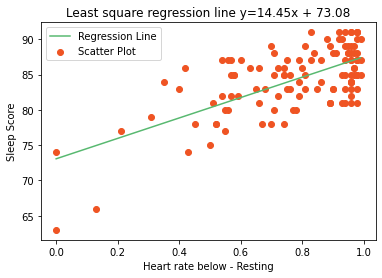

In [9]:
#Plotting least square regression line

mean_x = np.mean(X)
mean_y = np.mean(Y)
 
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)

# Printing coefficients
print("Coefficients")
print(f'm={round(m,2)}, c={round(c,2)}')

# Plotting Values and Regression Line
 
max_x = np.max(X)
min_x = np.min(X)
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Heart rate below - Resting')
plt.ylabel('Sleep Score')
plt.legend()
plt.title(f'Least square regression line y={round(m,2)}x + {round(c,2)}')
plt.show()

###### Takeaway

1) There's a strong correlation between sleep score and heart rate below resting (~0.7)

2) However, coefficient of determination that indicates how best is the fit is lesser (0.45)

3) Though the intuition is that both the variables are strongly related, the co-efficient of determination doesn't seem to be very strong 